In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import requests 
from bs4 import BeautifulSoup as bs

In [3]:
page_info=requests.get("https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_4_0_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_4_0_na_na_na&as-pos=4&as-type=HISTORY&suggestionId=mobiles&requestId=aabcc373-43c9-4f28-a461-238d69fa03c0&as-backfill=on")

In [4]:
page_info

<Response [200]>

In [5]:
soup=bs(page_info.content,'html.parser')

In [6]:
soup.contents

['html',
 <html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><

In [7]:
mobile_info=soup.find_all('div',class_='col col-7-12')

In [8]:
print(mobile_info)

[<div class="col col-7-12"><div class="_4rR01T">POCO M4 5G (Cool Blue, 64 GB)</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBGDRGPD6YGVHXZXRTTHJ_MOBGDRGPD6YGVHXZ_"><div class="_3LWZlK">4.2</div></span><span class="_2_R_DZ"><span><span>76,246 Ratings </span><span class="_13vcmD">&amp;</span><span> 5,379 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">4 GB RAM | 64 GB ROM | Expandable Upto 512 GB</li><li class="rgWa7D">16.71 cm (6.58 inch) Full HD+ Display</li><li class="rgWa7D">50MP + 2MP | 8MP Front Camera</li><li class="rgWa7D">5000 mAh Lithium Ion Polymer Battery</li><li class="rgWa7D">Mediatek Dimensity 700 Processor</li><li class="rgWa7D">1 Year Warranty for Handset and 6 Months for Accessories</li></ul></div></div>, <div class="col col-7-12"><div class="_4rR01T">SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBGENJWBPFYJSFTP8FGOC_MOBGENJWBPFYJSFT_">

In [9]:
print(len(mobile_info))

24


In [40]:
mobiles=[]
for mobile in mobile_info:
    mobile_name=mobile.find('div',class_='_4rR01T')
    name=mobile_name.contents[-1].text.split()[0]
    mobile_battery=mobile.find_all('li',class_='rgWa7D')
    battery=mobile_battery[3].contents[-1].text.split()[0]
    mobile_display=mobile.find_all('li',class_='rgWa7D')
    display=mobile_display[1].contents[-1].text.split()[0]
    mobile_dict={'name':name,
                 'battery':battery,
                 'display':display}
    mobiles.append(mobile_dict)

In [41]:
mobiles

[{'name': 'POCO', 'battery': '5000', 'display': '16.71'},
 {'name': 'SAMSUNG', 'battery': '6000', 'display': '16.76'},
 {'name': 'Infinix', 'battery': '6000', 'display': '16.76'},
 {'name': 'realme', 'battery': '5000', 'display': '17.02'},
 {'name': 'Infinix', 'battery': '6000', 'display': '16.76'},
 {'name': 'Infinix', 'battery': '6000', 'display': '16.76'},
 {'name': 'POCO', 'battery': '5000', 'display': '17.04'},
 {'name': 'Cellecor', 'battery': '1000', 'display': '4.57'},
 {'name': 'SAMSUNG', 'battery': '6000', 'display': '16.76'},
 {'name': 'POCO', 'battery': '5000', 'display': '16.56'},
 {'name': 'MOTOROLA', 'battery': '5000', 'display': '16.64'},
 {'name': 'Cellecor', 'battery': '1000', 'display': '4.57'},
 {'name': 'POCO', 'battery': '5000', 'display': '16.56'},
 {'name': 'SAMSUNG', 'battery': '5000', 'display': '16.51'},
 {'name': 'SAMSUNG', 'battery': '6000', 'display': '16.76'},
 {'name': 'POCO', 'battery': '5000', 'display': '17.04'},
 {'name': 'POCO', 'battery': '5000', 'd

In [42]:
mobile_df=pd.DataFrame(mobiles)
mobile_df

,name,battery,display
0,POCO,5000,16.71
1,SAMSUNG,6000,16.76
2,Infinix,6000,16.76
3,realme,5000,17.02
4,Infinix,6000,16.76
5,Infinix,6000,16.76
6,POCO,5000,17.04
7,Cellecor,1000,4.57
8,SAMSUNG,6000,16.76
9,POCO,5000,16.56


In [43]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     24 non-null     object
 1   battery  24 non-null     object
 2   display  24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [44]:
mobile_df.isna().sum()

name       0
battery    0
display    0
dtype: int64

In [45]:
mobile_df1=mobile_df.drop_duplicates()

In [46]:
mobile_df1.duplicated()

0     False
1     False
2     False
3     False
6     False
7     False
9     False
10    False
13    False
21    False
dtype: bool

In [47]:
mobile_df1

,name,battery,display
0,POCO,5000,16.71
1,SAMSUNG,6000,16.76
2,Infinix,6000,16.76
3,realme,5000,17.02
6,POCO,5000,17.04
7,Cellecor,1000,4.57
9,POCO,5000,16.56
10,MOTOROLA,5000,16.64
13,SAMSUNG,5000,16.51
21,Infinix,5000,16.76


In [50]:
X=mobile_df1.iloc[:,-2:]
y=mobile_df1.iloc[:,0]

In [51]:
X

,battery,display
0,5000.0,16.71
1,6000.0,16.76
2,6000.0,16.76
3,5000.0,17.02
6,5000.0,17.04
7,1000.0,4.57
9,5000.0,16.56
10,5000.0,16.64
13,5000.0,16.51
21,5000.0,16.76


In [59]:
y

0         POCO
1      SAMSUNG
2      Infinix
3       realme
6         POCO
7     Cellecor
9         POCO
10    MOTOROLA
13     SAMSUNG
21     Infinix
Name: name, dtype: object

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<AxesSubplot:ylabel='Count'>

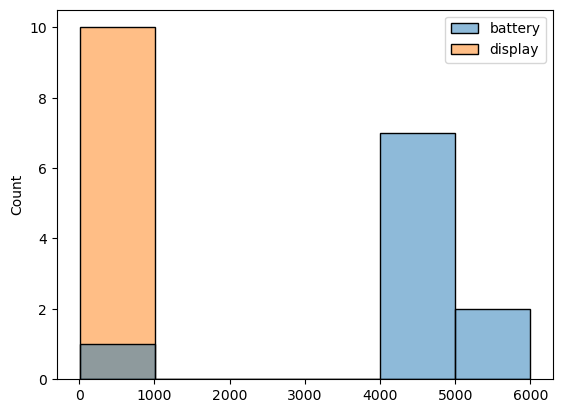

In [62]:
sns.histplot(data=mobile_df1)

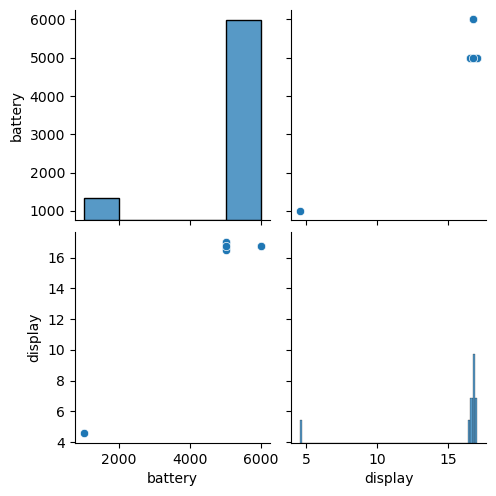

In [63]:
sns.pairplot(data=mobile_df1)

<AxesSubplot:>

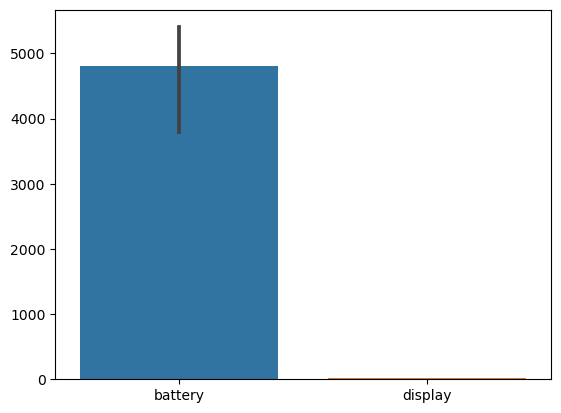

In [64]:
sns.barplot(data=mobile_df1)

<AxesSubplot:>

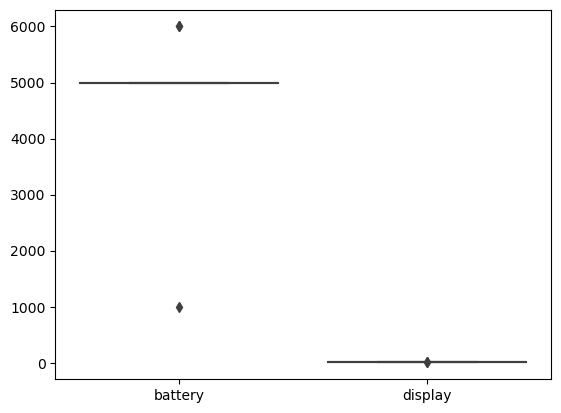

In [65]:
sns.boxplot(data=mobile_df1)

array([[<AxesSubplot:title={'center':'battery'}>,
        <AxesSubplot:title={'center':'display'}>]], dtype=object)

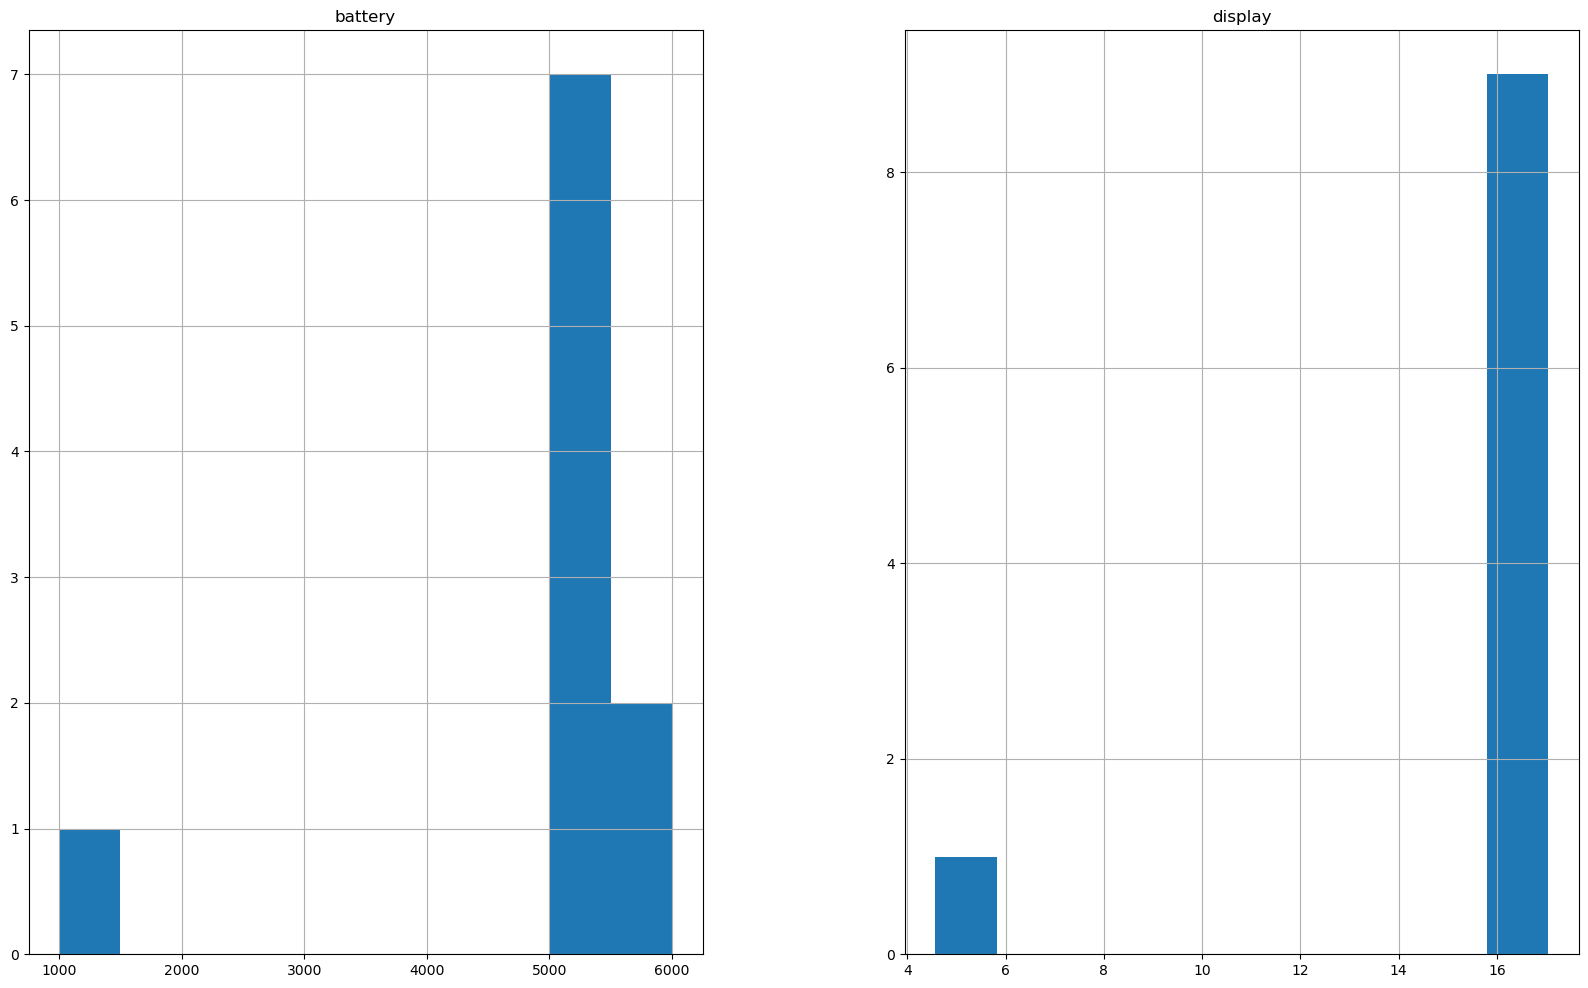

In [66]:
mobile_df1.hist(figsize=(20,12))